In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier 
from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            plot_confusion_matrix) 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

np.random.seed(2121)

In [3]:
train=pd.read_csv('train_eda.csv')
test=pd.read_csv('test_eda.csv')

In [4]:
train.shape

(26728, 27)

In [5]:
train.head()

,outcometype,ageuponoutcome,has_name,is_mix,cat_breed_shorthair,cat_breed_mediumhair,cat_breed_longhair,cat_breed_siamese,dog_breed_chihuahua,dog_breed_pitbull,...,age_old,primary_color_Black,primary_color_Blue,primary_color_Brown,primary_color_Gray,primary_color_Orange,primary_color_Tan,primary_color_Tricolor,primary_color_White,month
0,Return_to_owner,1.00,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Feb
1,Euthanasia,1.00,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Oct
2,Adoption,2.00,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,Jan
3,Transfer,0.06,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,July
4,Transfer,2.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Nov


In [11]:
train.outcometype.value_counts(dropna=False)

Adoption           10769
Transfer            9422
Return_to_owner     4785
Euthanasia          1555
Died                 197
Name: outcometype, dtype: int64

In [13]:
train['outcometype'] = [0 if x == 'Return_to_owner' 
                   else 1 if x == "Euthanasia" 
                   else 2 if x=='Adoption'
                   else 3 if x=='Transfer'
                   else 4 for x in train['outcometype'] ]

In [14]:
train.head()

,outcometype,ageuponoutcome,has_name,is_mix,cat_breed_shorthair,cat_breed_mediumhair,cat_breed_longhair,cat_breed_siamese,dog_breed_chihuahua,dog_breed_pitbull,...,age_old,primary_color_Black,primary_color_Blue,primary_color_Brown,primary_color_Gray,primary_color_Orange,primary_color_Tan,primary_color_Tricolor,primary_color_White,month
0,0,1.00,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Feb
1,1,1.00,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Oct
2,2,2.00,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,Jan
3,3,0.06,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,July
4,3,2.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Nov


In [15]:
#To print model scores
def score(model, name, X, y):
    cv = StratifiedKFold(n_splits=10,
                         random_state=42,
                         shuffle=True)
    s = cross_val_score(model, X, y, cv=cv,
                        n_jobs=-1)
    print('{} Score: {:.2f} +- {:.3f}'.format(name, 
                                              s.mean(), 
                                              2 * s.std()))

In [16]:
def rfscore2(df,target_col,test_size,n_estimators,max_depth):
    '''Gridsearching RandomForest'''
    X = df.drop(target_col, axis=1)   # predictors
    y = df[target_col]                # target
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, test_size = test_size, random_state=42) # TT split
    rf_params = {
             'n_estimators':n_estimators,
             'max_depth':max_depth}   # parameters for grid search
    rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1, n_jobs=-1)
    rf_gs.fit(X_train,y_train) # training the random forest with all possible parameters
    print('GridSearch results')
    print('The best parameters on the training data are:\n',rf_gs.best_params_) # printing the best parameters
    max_depth_best = rf_gs.best_params_['max_depth']      # getting the best max_depth
    n_estimators_best = rf_gs.best_params_['n_estimators']  # getting the best n_estimators
    print("best max_depth:",max_depth_best)
    print("best n_estimators:",n_estimators_best)
    best_rf_gs = RandomForestClassifier(max_depth=max_depth_best,n_estimators=n_estimators_best) # instantiate the best model
    
    score(best_rf_gs, 'Random Forest', X_train, y_train)
    
    best_rf_gs.fit(X_train,y_train)  # fitting the best model

    preds = best_rf_gs.predict(X_test)
    print("")
    
    print("Confusion Matrix:\n")
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print(accuracy_score(y_test, preds))

    
    print('Features and their importance:\n')
    feature_importances = pd.Series(best_rf_gs.feature_importances_, index=X.columns).sort_values().tail(10)
    print(feature_importances.plot(kind="barh", figsize=(6,6)))
    return

Fitting 5 folds for each of 110 candidates, totalling 550 fits
GridSearch results
The best parameters on the training data are:
 {'max_depth': 11, 'n_estimators': 25}
best max_depth: 11
best n_estimators: 25
Random Forest Score: 0.64 +- 0.016

Confusion Matrix:

[[ 491   10  557  171    0]
 [  78   40   67  197    0]
 [ 293    6 2255  132    0]
 [ 205   26  630 1472    0]
 [   6    3    8   35    0]]
              precision    recall  f1-score   support

           0       0.46      0.40      0.43      1229
           1       0.47      0.10      0.17       382
           2       0.64      0.84      0.73      2686
           3       0.73      0.63      0.68      2333
           4       0.00      0.00      0.00        52

    accuracy                           0.64      6682
   macro avg       0.46      0.39      0.40      6682
weighted avg       0.62      0.64      0.62      6682

0.6372343609697695
Features and their importance:

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


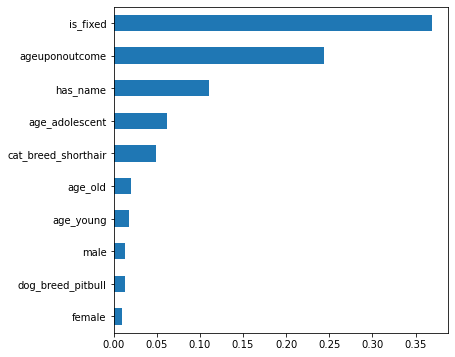

In [19]:
n_estimators = list(range(5,27,2))
max_depth = list(range(1, 21, 2)) 
rfscore2(train.drop(columns= ['month']),'outcometype',0.25,n_estimators,max_depth)